##### Importing External libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score,log_loss


###### Data Exploration on Training Set

In [2]:
# Loading the train data
df = pd.read_csv('../Binary Classification/dataset/training_set.csv', index_col=0)
#shape of data
print('Shape of Data:' , df.shape)

# Peek the first 5 rows of data
df.head(5)

Shape of Data: (3910, 58)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.0,0.56,...,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.0,0.00,...,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1


In [3]:
# Checking Y distribution 
df['Y'].value_counts(normalize=True)

0    0.607673
1    0.392327
Name: Y, dtype: float64

In [4]:
# Checking for null and missing values
df.isna().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
X24    0
X25    0
X26    0
X27    0
X28    0
X29    0
X30    0
X31    0
X32    0
X33    0
X34    0
X35    0
X36    0
X37    0
X38    0
X39    0
X40    0
X41    0
X42    0
X43    0
X44    0
X45    0
X46    0
X47    0
X48    0
X49    0
X50    0
X51    0
X52    0
X53    0
X54    0
X55    0
X56    0
X57    0
Y      0
dtype: int64

In [5]:
# Getting insights in data
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
count,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,...,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000
mean,0.102990,0.206419,0.284419,0.062074,0.311309,0.095974,0.112320,0.106041,0.091146,0.244345,...,0.037493,0.139252,0.015876,0.272971,0.077820,0.043828,5.047150,52.338107,283.059079,0.392327
std,0.296322,1.253828,0.504352,1.369361,0.656195,0.261455,0.389516,0.398694,0.271417,0.667065,...,0.235054,0.276309,0.083600,0.858634,0.256991,0.452862,31.397035,204.445218,578.339858,0.488331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.580750,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.263500,15.000000,94.000000,0.000000
75%,0.000000,0.000000,0.430000,0.000000,0.387500,0.000000,0.000000,0.000000,0.000000,0.170000,...,0.000000,0.188000,0.000000,0.317250,0.054000,0.000000,3.714000,43.000000,264.000000,1.000000
max,4.340000,14.280000,4.540000,42.810000,9.090000,3.570000,7.270000,11.110000,3.230000,18.180000,...,4.385000,9.752000,2.777000,32.478000,6.003000,19.829000,1102.500000,9989.000000,10062.000000,1.000000


##### Defining Exploratory Variables and Target Variables

In [6]:
# Setting up x and Y values
X = df.drop(['Y'], axis=1)
y = df['Y']

###### Splitting Training Set into training and test sets

In [7]:
# Splitting data into training and validation sets
X_train, X_test,y_train, y_test= train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)

In [8]:
# Shape of training data
X_train.shape

(3128, 57)

##### Selecting features using Random Forest Classifier

In [9]:
cls = RandomForestClassifier(100, max_depth=None, n_jobs=-1)
cls.fit(X_train, y_train)
feature_imp = cls.feature_importances_

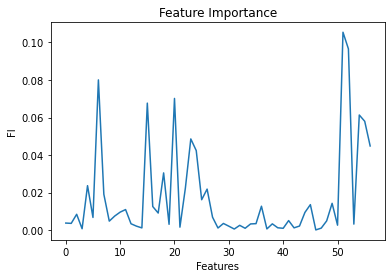

In [10]:
# Visualizing the features of importance
x = [ x for x in range(X_train.shape[1])]
plt.plot(x, feature_imp)
plt.xlabel('Features')
plt.ylabel('FI')
plt.title('Feature Importance')
plt.show()

In [11]:
# Selecting features with greater importance than average
mean_imp = np.mean(feature_imp)
top_imp = len(np.where(feature_imp > mean_imp)[0])
print('Features with greater importance than average:' , top_imp)

Features with greater importance than average: 15


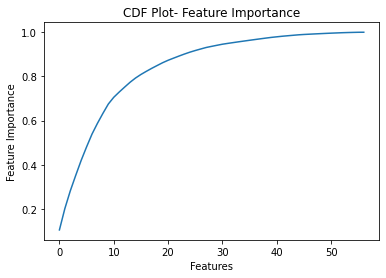

In [12]:
# Cummulative Distribution Function plot for Feature Importance
plt.plot(np.cumsum(sorted(feature_imp, reverse=True)))
plt.title('CDF Plot- Feature Importance')
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.show()

In [13]:
# Ranking features based on their importances
imp = sorted(zip(X.columns, feature_imp), key=lambda x: x[1], reverse=True)
# Extracting top 30 features based on cdf plot
features = [x[0] for x in imp[:30]]

In [14]:
X_train_final = X_train[features]
X_test_final = X_test[features]

# Shape of X_train_final
print('Shape of new X_train data: ', X_train_final.shape)
print('Shape of new X_test data:' , X_test_final.shape)

Shape of new X_train data:  (3128, 40)
Shape of new X_test data: (782, 40)


###### Applying Normalization of Data for numerical stability of data using StandardScaler

In [15]:
scaler = StandardScaler()
scaler.fit(X_train_final)

# Transforming the data
X_train_final = pd.DataFrame(scaler.transform(X_train_final), columns=X_train_final.columns)
X_test_final = pd.DataFrame(scaler.transform(X_test_final), columns=X_test_final.columns)

### Model Training

1. Random Model
2. Logistic Regression
3. Naive-Bayes Classifier
4. Support Vector Machine
5. K- Nearest Neighbors
6. Decision Tree
7. Random Forest Classifier
8. XG Boost Classifier

In [16]:
## 1. Random Model

y_pred_train = np.random.rand(len(X_train_final))
y_pred_test = np.random.rand(len(X_test_final))

In [17]:
## Logloss
print('Train Log-loss:' , log_loss(y_train, y_pred_train))
print('Test Log-loss', log_loss(y_test,y_pred_test))

## AUC Score
print('\n')
print('Train AUC Score:', roc_auc_score(y_train, y_pred_train))
print('Test AUC Score:', roc_auc_score(y_test, y_pred_test))

Train Log-loss: 1.0462431257650466
Test Log-loss 0.9978214918721443


Train AUC Score: 0.4870571701849539
Test AUC Score: 0.49435967769586836


In [18]:
# 2. Logistic Regression

cls = LogisticRegression(C=1, penalty='l2', max_iter=250, random_state=42)
cls.fit(X_train_final, y_train)

y_train_pred = cls.predict(X_train_final)
y_train_probab = cls.predict_proba(X_train_final)[:,1]

y_test_pred = cls.predict(X_test_final)
y_test_probab = cls.predict_proba(X_test_final)[:,1]


In [19]:
## Logloss
print('Train Log-loss:' , log_loss(y_train, y_train_probab))
print('Test Log-loss', log_loss(y_test,y_test_probab))

## AUC Score
print('\n')
print('Train AUC Score:', roc_auc_score(y_train, y_train_probab))
print('Test AUC Score:', roc_auc_score(y_test, y_test_probab))

Train Log-loss: 2.079386041256884
Test Log-loss 2.539948617183178


Train AUC Score: 0.9542551919013157
Test AUC Score: 0.9359369106806104


In [20]:
# 3. Naive Bayes 

cls = GaussianNB()
cls.fit(X_train_final, y_train)

y_train_pred = cls.predict(X_train_final)
y_train_probab = cls.predict_proba(X_train_final)[:,1]

y_test_pred = cls.predict(X_test_final)
y_test_probab = cls.predict_proba(X_test_final)[:,1]


In [21]:
## Logloss
print('Train Log-loss:' , log_loss(y_train, y_train_probab))
print('Test Log-loss', log_loss(y_test,y_test_probab))

## AUC Score
print('\n')
print('Train AUC Score:', roc_auc_score(y_train, y_train_probab))
print('Test AUC Score:', roc_auc_score(y_test, y_test_probab))

Train Log-loss: 0.2045100932276941
Test Log-loss 0.3182997146231641


Train AUC Score: 0.9750463767407622
Test AUC Score: 0.9608640493742499


In [32]:
# 4. Support Vector Machine
cls = LinearSVC(penalty='l2', max_iter=250, random_state=42, tol=1e-5)
cls.fit(X_train_final, y_train)

y_train_pred = cls.predict(X_train_final)
y_train_probab = cls._predict_proba_lr(X_train_final)[:,1]

y_test_pred = cls.predict(X_test_final)
y_test_probab = cls._predict_proba_lr(X_test_final)[:,1]

C:\Users\shagu\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [33]:
## Logloss
print('Train Log-loss:' , log_loss(y_train, y_train_probab))
print('Test Log-loss', log_loss(y_test,y_test_probab))

## AUC Score
print('\n')
print('Train AUC Score:', roc_auc_score(y_train, y_train_probab))
print('Test AUC Score:', roc_auc_score(y_test, y_test_probab))

Train Log-loss: 0.3015570524619252
Test Log-loss 0.34965542231444574


Train AUC Score: 0.9739269899126569
Test AUC Score: 0.9570581176067204


In [36]:
# 5. K-Nearest Neighbors
cls = KNeighborsClassifier()
cls.fit(X_train_final, y_train)

y_train_pred = cls.predict(X_train_final)
y_train_probab = cls.predict_proba(X_train_final)[:,1]

y_test_pred = cls.predict(X_test_final)
y_test_probab = cls.predict_proba(X_test_final)[:,1]


In [37]:
## Logloss
print('Train Log-loss:' , log_loss(y_train, y_train_probab))
print('Test Log-loss', log_loss(y_test,y_test_probab))

## AUC Score
print('\n')
print('Train AUC Score:', roc_auc_score(y_train, y_train_probab))
print('Test AUC Score:', roc_auc_score(y_test, y_test_probab))

Train Log-loss: 0.1460293894671316
Test Log-loss 1.1047096924176398


Train AUC Score: 0.9844801367786954
Test AUC Score: 0.9398765643751071


In [22]:
# 6. Decision Tree

cls = DecisionTreeClassifier(criterion='gini', min_samples_split=3, random_state=42)
cls.fit(X_train_final, y_train)

y_train_pred = cls.predict(X_train_final)
y_train_probab = cls.predict_proba(X_train_final)[:,1]

y_test_pred = cls.predict(X_test_final)
y_test_probab = cls.predict_proba(X_test_final)[:,1]


In [23]:
## Logloss
print('Train Log-loss:' , log_loss(y_train, y_train_probab))
print('Test Log-loss', log_loss(y_test,y_test_probab))

## AUC Score
print('\n')
print('Train AUC Score:', roc_auc_score(y_train, y_train_probab))
print('Test AUC Score:', roc_auc_score(y_test, y_test_probab))

Train Log-loss: 0.006204642281228122
Test Log-loss 3.670356214027986


Train AUC Score: 0.9999579854809827
Test AUC Score: 0.888853077318704


In [24]:
# 7. Random Forest

cls = RandomForestClassifier(n_estimators=500,
                             max_depth=None,
                             min_samples_split=3,
                             n_jobs=1,
                             class_weight='balanced',
                             random_state=42)
cls.fit(X_train_final, y_train)

y_train_pred = cls.predict(X_train_final)
y_train_probab = cls.predict_proba(X_train_final)[:,1]

y_test_pred = cls.predict(X_test_final)
y_test_probab = cls.predict_proba(X_test_final)[:,1]


In [25]:
## Logloss
print('Train Log-loss:' , log_loss(y_train, y_train_probab))
print('Test Log-loss', log_loss(y_test,y_test_probab))

## AUC Score
print('\n')
print('Train AUC Score:', roc_auc_score(y_train, y_train_probab))
print('Test AUC Score:', roc_auc_score(y_test, y_test_probab))

Train Log-loss: 0.050555559840196045
Test Log-loss 0.14504401589668053


Train AUC Score: 0.9999982851216729
Test AUC Score: 0.993334476255786


In [26]:
# 8. XGBoost
cls = XGBClassifier(n_estimators=500,
                    max_depth=5,
                    learning_rate=0.15,
                    colsample_bytree=1,
                    subsample=1,
                    reg_alpha=0.3,
                    gamma=10,
                    n_jobs=2,
                    eval_metric='logloss',
                    use_label_encoder=False)

cls.fit(X_train_final, y_train)

y_train_pred = cls.predict(X_train_final)
y_train_probab = cls.predict_proba(X_train_final)[:,1]

y_test_pred = cls.predict(X_test_final)
y_test_probab = cls.predict_proba(X_test_final)[:,1]


In [27]:
## Logloss
print('Train Log-loss:' , log_loss(y_train, y_train_probab))
print('Test Log-loss', log_loss(y_test,y_test_probab))

## AUC Score
print('\n')
print('Train AUC Score:', roc_auc_score(y_train, y_train_probab))
print('Test AUC Score:', roc_auc_score(y_test, y_test_probab))

Train Log-loss: 0.14256450472324564
Test Log-loss 0.15504043212617794


Train AUC Score: 0.9896294876758126
Test AUC Score: 0.9883456197496999


### Conclusions:
1. Based on previous EDA, I decided to include the train, test log-loss and AUC Score metric for selecting a model. 
2. From the above observation, We can see that the test log-loss is the least for XGBoost model. 
3. We can also see that the difference between log-loss between train and test data is the least for XGBoost. 
4. Moreover, we can also conclude that there is no overfitting because the divergence between train and test data determines whether a model is overfititng or underfitting the data. 
5. Hence, The model selected for test data performance is XGBoost. 